In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import sys
import os
import time
import numpy as n

from collections import OrderedDict
import time
import gc

Populating the interactive namespace from numpy and matplotlib


In [2]:
directory = 'recordings'
filename = ['es_pipe_', '_quaddemod_lpf_10.0lpf2_10.0']
chars = ['!','U','@']

In [3]:
recordings = {}
for char in chars:
#     print char
    recordings[char] = n.fromfile(os.path.join(directory, filename[0] + char + filename[1]), dtype=n.float32)

In [4]:
def find_all(a_str, sub):
    res = []
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return res
        res.append(start)
        start += len(sub) # use start += 1 to find overlapping matches


In [5]:
def secs_to_sample(seconds): return n.int(seconds/period)

In [45]:
recordings['U'] = recordings['U'][secs_to_sample(transmission_start):secs_to_sample(transmission_end)]

(-100, 100)

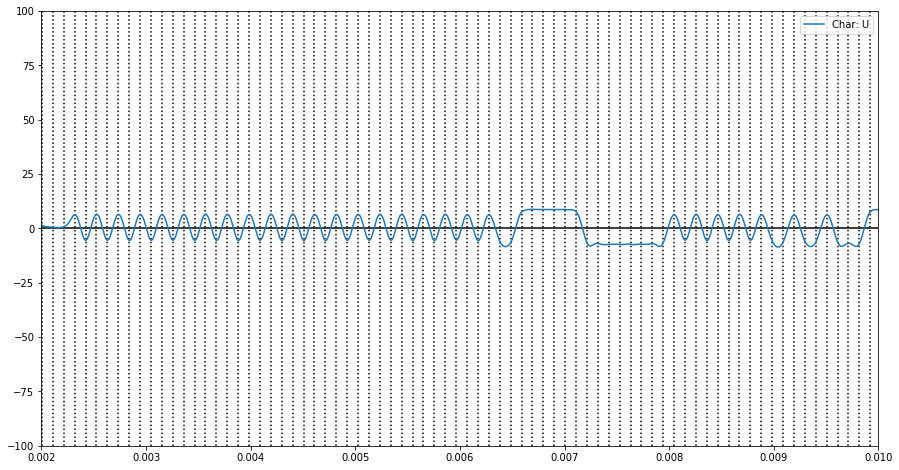

In [76]:
n_samples = recordings['U'].shape[0]
sample_rate = 4.0032e6
period = 1.0/sample_rate

baudrate = 9600
baud_period = 1.0/float(baudrate)

fig = plt.figure(figsize=(15,8))
ts = n.arange(0, period * n_samples, period)

transmission_start = 0
transmission_end = n_samples*period

start = 0
stop = n_samples
for char in ['U']:
    plot(ts[start:stop],recordings[char][start:stop] - 15, label="Char: " + str(char))
time = linspace
for i in range(int(0.02/baud_period)):
    plt.vlines(transmission_start + i*baud_period + 0.25*baud_period, -100, 100, linestyles='dotted')
plt.hlines(0,0,2)
plt.xlim(0.002, 0.01)
plt.legend(loc='best')
plt.ylim(-100,100)

In [74]:
bits = ''
phase_delay = 0.25
level=15
t = 0
while t < n_samples*period:
    bits += '1' if recordings['U'][secs_to_sample(t)] > level else '0'
    t += baud_period

In [75]:
bits

'0100000010000001111111101010101010101010101010101010101010101001111110000000010101010100100100011011100001111000001100'